In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [41]:
test_data = pd.read_csv(r'/home/ali/Downloads/project 1/test.csv')

train_data = pd.read_csv(r'/home/ali/Downloads/project 1/train.csv')
train_data_1 = train_data['Sex']
train_data_2  = train_data['Survived']

In [42]:
print(test_data.head())
print(train_data.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1 

In [43]:
test_data.sample() , train_data.sample()

(   PassengerId  Pclass                  Name     Sex   Age  SibSp  Parch  \
 6          898       3  Connolly, Miss. Kate  female  30.0      0      0   
 
    Ticket    Fare Cabin Embarked  
 6  330972  7.6292   NaN        Q  ,
      PassengerId  Survived  Pclass                       Name   Sex   Age  \
 442          443         0       3  Petterson, Mr. Johan Emil  male  25.0   
 
      SibSp  Parch  Ticket   Fare Cabin Embarked  
 442      1      0  347076  7.775   NaN        S  )

In [44]:
train_data.shape , test_data.shape

((891, 12), (418, 11))

In [45]:
train_data.info() ,"******", test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, '******', None)

In [46]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [48]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

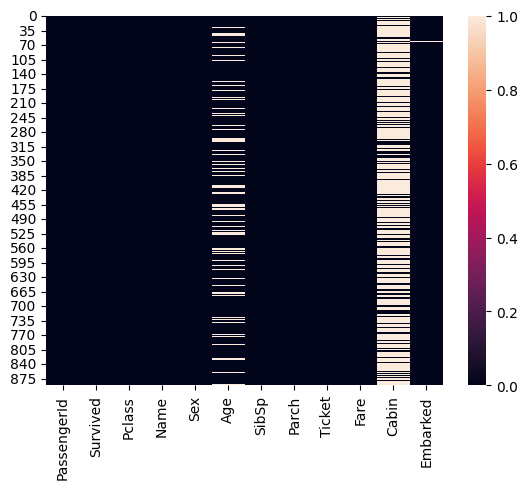

In [50]:
sns.heatmap(train_data.isnull())

/tmp/ipykernel_5061/3334639092.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(x='Sex', hue='Survived', data=train_data,color = 'blue')


<Axes: xlabel='Sex', ylabel='count'>

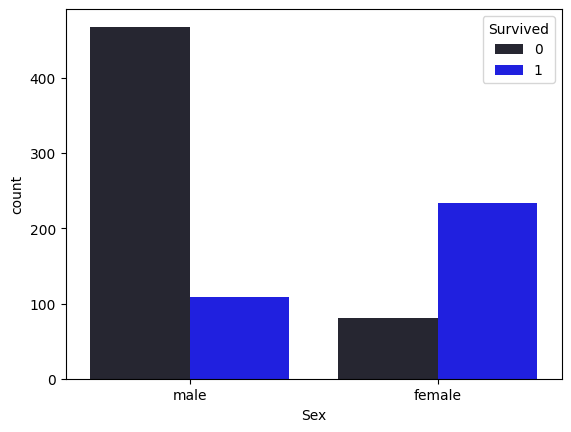

In [51]:
sns.countplot(x='Sex', hue='Survived', data=train_data,color = 'blue')

In [52]:
train_data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [53]:
train_data.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [54]:
train_data.drop(['Name', 'Ticket', 'Fare', 'Embarked', 'Cabin'], axis=1, inplace=True)
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.000000,1,0
1,2,1,1,female,38.000000,1,0
2,3,1,3,female,26.000000,0,0
3,4,1,1,female,35.000000,1,0
4,5,0,3,male,35.000000,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0
887,888,1,1,female,19.000000,0,0
888,889,0,3,female,29.699118,1,2
889,890,1,1,male,26.000000,0,0


In [55]:
train_data.dropna()
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [56]:
test_data.drop(['Name', 'Ticket', 'Fare', 'Embarked', 'Cabin'], axis=1, inplace=True)
test_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data.dropna()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,22.000000,0,0
1,893,3,female,38.000000,1,0
2,894,2,male,26.000000,0,0
3,895,3,male,35.000000,0,0
4,896,3,female,35.000000,1,1
...,...,...,...,...,...,...
413,1305,3,male,29.699118,0,0
414,1306,1,female,44.000000,0,0
415,1307,3,male,29.699118,0,0
416,1308,3,male,34.000000,0,0


In [57]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [58]:
train_data_int = train_data.select_dtypes(include='int')
train_data_int.corr()

,PassengerId,Survived,Pclass,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,0.083081,0.018443
SibSp,-0.057527,-0.035322,0.083081,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,0.414838,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'PassengerId'),
  Text(1.5, 0, 'Survived'),
  Text(2.5, 0, 'Pclass'),
  Text(3.5, 0, 'SibSp'),
  Text(4.5, 0, 'Parch')])

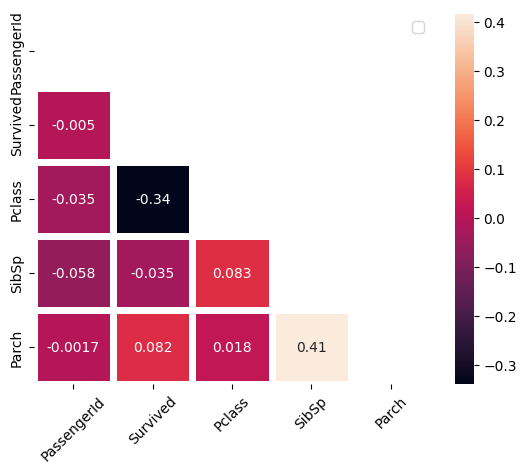

In [59]:
mask = np.triu(np.ones_like(train_data_int.corr()))
sns.heatmap(train_data_int.corr(), mask=mask, annot=True,linewidth=5)
plt.legend()
plt.xticks(rotation=45)


<Axes: ylabel='count'>

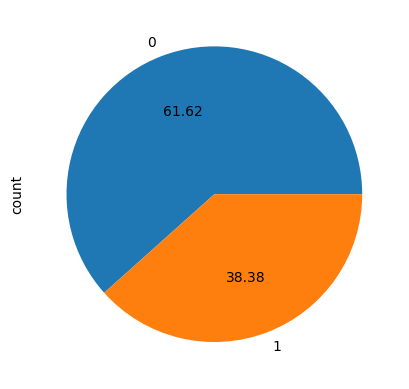

In [60]:
train_data['Survived'].value_counts()
train_data['Survived'].value_counts().plot.pie(autopct='%0.2f')

<Axes: ylabel='count'>

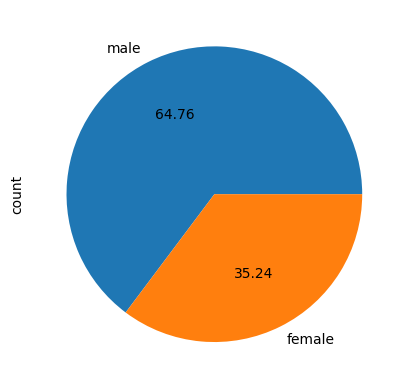

In [61]:
train_data_1.value_counts()
train_data_1.value_counts().plot.pie(autopct='%0.2f')

<Axes: xlabel='Age', ylabel='Count'>

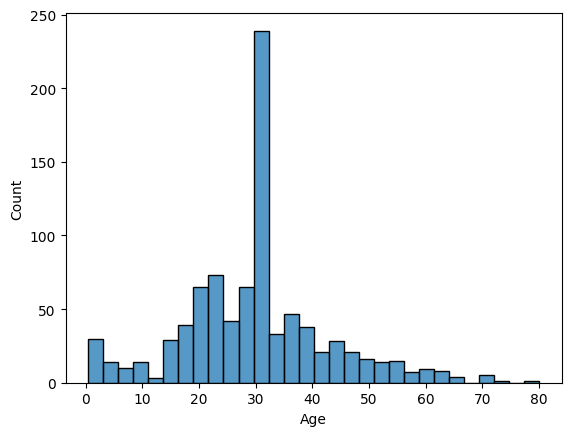

In [62]:
sns.histplot(train_data['Age'])

In [63]:
train_data['Sex'] = train_data['Sex'].map({'male': 1, 'female': 0}).astype(int)
test_data['Sex'] = test_data['Sex'].map({'male': 1, 'female': 0}).astype(int)


In [64]:
test_data


,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,22.000000,0,0
1,893,3,0,38.000000,1,0
2,894,2,1,26.000000,0,0
3,895,3,1,35.000000,0,0
4,896,3,0,35.000000,1,1
...,...,...,...,...,...,...
413,1305,3,1,29.699118,0,0
414,1306,1,0,44.000000,0,0
415,1307,3,1,29.699118,0,0
416,1308,3,1,34.000000,0,0


In [65]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
dtypes: float64(1), int64(5

5 - Create Model


In [66]:
x = train_data.drop(['Survived'],axis=1)
y = train_data.Survived

In [67]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [68]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
pred = model.predict(X_test)

In [70]:
accuracy_score(pred, y_test)

0.7653631284916201

In [71]:
accuracies=[]

In [72]:
def all(models, X_train, y_train, X_test, y_test):
    accuracies = []
    for model in models:  # Looping over models inside the function
        model.fit(X_train, y_train)  # Train the model
        pred = model.predict(X_test)  # Predict on the test set
        accuracy = accuracy_score(y_test, pred)  # Calculate accuracy
        print(f"Accuracy of {model.__class__.__name__}: {accuracy}")
        accuracies.append(accuracy)  # Store the accuracy
    return accuracies

In [73]:
models = [
    LogisticRegression(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=10),
    GaussianNB(),
    SVC()
]
accuracies = all(models, X_train, y_train, X_test, y_test)
new_data = pd.DataFrame(accuracies)

/home/ali/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LogisticRegression: 0.7877094972067039
Accuracy of GradientBoostingClassifier: 0.7988826815642458
Accuracy of RandomForestClassifier: 0.7653631284916201
Accuracy of KNeighborsClassifier: 0.5642458100558659
Accuracy of GaussianNB: 0.7653631284916201
Accuracy of SVC: 0.6256983240223464


In [74]:
model_accuracies = {
    'LogisticRegression': 0.8212290502793296,
    'GradientBoostingClassifier': 0.7877094972067039,
    'RandomForestClassifier': 0.770949720670391,
    'KNeighborsClassifier': 0.5921787709497207,
    'GaussianNB': 0.7877094972067039,
    'SVC': 0.6424581005586593
}
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])
print(accuracy_df)


                        Model  Accuracy
0          LogisticRegression  0.821229
1  GradientBoostingClassifier  0.787709
2      RandomForestClassifier  0.770950
3        KNeighborsClassifier  0.592179
4                  GaussianNB  0.787709
5                         SVC  0.642458


In [75]:
print(max(accuracies))

0.7988826815642458


In [76]:
final = test_data.PassengerId
modelx = GradientBoostingClassifier()
modelx.fit(X_train,y_train)

GradientBoostingClassifier()

In [77]:
lpred = modelx.predict(test_data)
new_dataframe = pd.DataFrame({'PassengerId':final,'Survived':lpred})

In [78]:
new_dataframe.to_csv('submission.csv',index=False)